In [ ]:
# Import modules
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid
import numpy as np

In [ ]:
# Read raw DEM
grid = Grid.from_raster('../datos/dem_elhigo_wgs84.tif') # datos\dem_elhigo.tif
dem = grid.read_raster('../datos/dem_elhigo_wgs84.tif')

In [ ]:
print(grid.nodata)
print("Valor mínimo:", np.nanmin(dem))
print("Valor máximo:", np.nanmax(dem))

32767
Valor mínimo: 1
Valor máximo: 32767


In [7]:
# corregimos valores nulos del dem
dem = np.where((dem == grid.nodata) | (dem < 0), np.nan, dem)

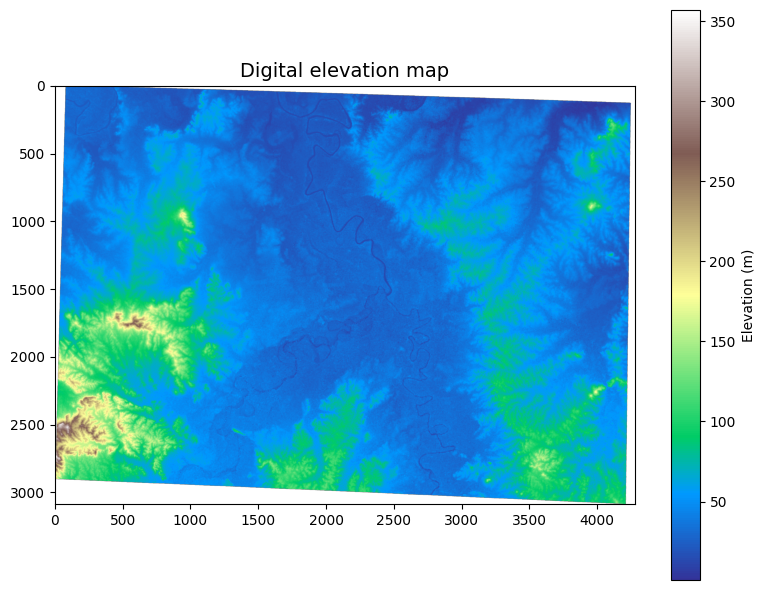

In [ ]:
# Plot the raw DEM
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.imshow(dem, cmap='terrain', vmin=0, vmax=350)
plt.colorbar(label='Elevation (m)')
plt.title('Digital elevation map', size=14)
plt.tight_layout()

# Detectando planices Flats consist of cells at which every surrounding cell is at the same elevation or higher. Note that we have created flats by filling in our pits and depressions.

In [11]:
flats = grid.detect_flats(dem)
flats.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'nodata'

In [25]:
# Detect pits
pits = grid.detect_pits(dem)

In [28]:
# Fill pits
pit_filled_dem = grid.fill_pits(dem)
pits = grid.detect_pits(pit_filled_dem)
assert not pits.any()

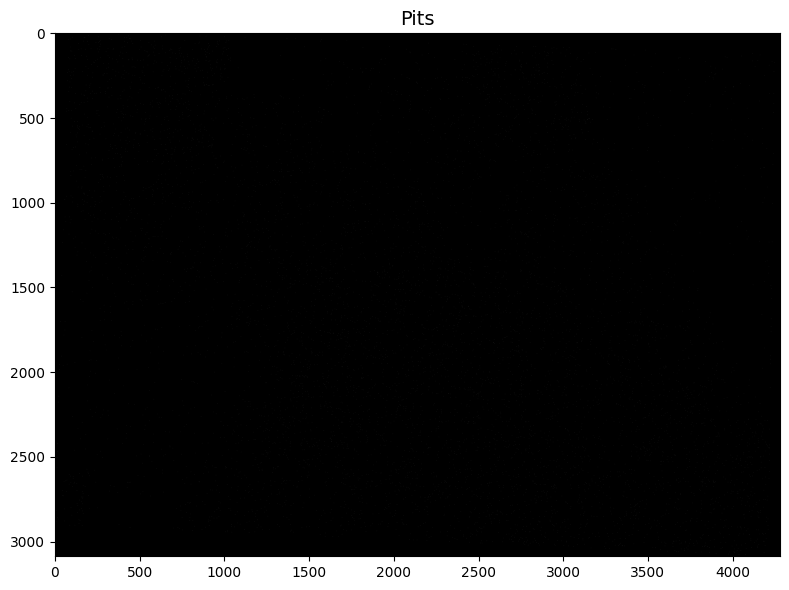

In [26]:
# Plot pits
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(pits, cmap='Greys_r', zorder=1)
plt.title('Pits', size=14)
plt.tight_layout()